Estudiante: Jean Marco Bello Colque

Ejercicio 1

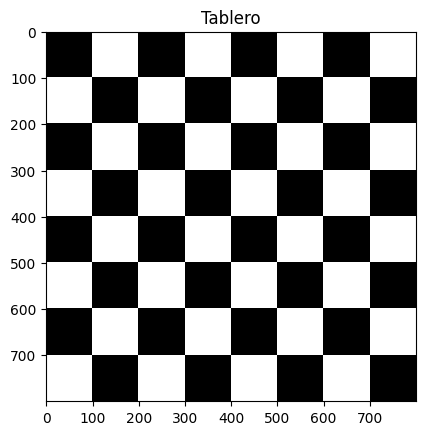

True

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

casilla = 100
filas, columnas = 8, 8

tablero = np.zeros((filas * casilla, columnas * casilla), dtype=np.uint8)

for i in range(filas):
    for j in range(columnas):
        if (i + j) % 2 == 0:
            tablero[i*casilla:(i+1)*casilla, j*casilla:(j+1)*casilla] = 0
        else:
            tablero[i*casilla:(i+1)*casilla, j*casilla:(j+1)*casilla] = 192

plt.imshow(tablero, cmap="gray", interpolation="nearest")
plt.title("Tablero")
plt.axis("on")
plt.show()

cv2.imwrite("tablero.jpg", tablero)


Ejercicio 2

In [ ]:
#Son los amigos que hicimos en el camino

ModuleNotFoundError: No module named 'ma'

Ejercicio 3

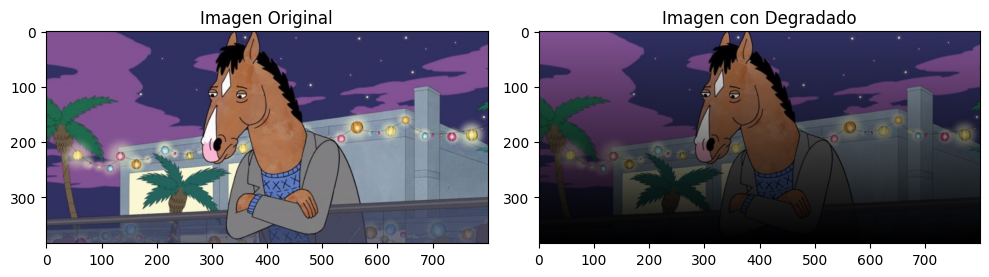

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("1.jpg")
h, w, _ = img.shape
degradado = np.linspace(1, 0, h, dtype=np.float32).reshape(h, 1, 1)
resultado = (img.astype(np.float32) * degradado).astype(np.uint8)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("on")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Degradado")
plt.axis("on")
plt.tight_layout()
plt.show()



Ejercicio 4

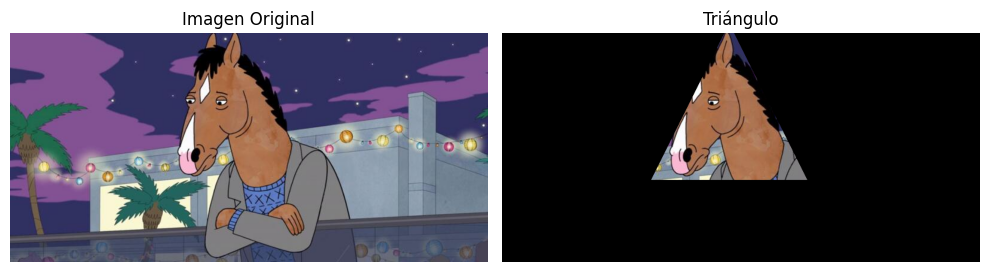

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("1.jpg")
h, w = img.shape[:2]

mask = np.zeros((h, w), dtype=np.uint8)

cx, cy = w // 2.1, h // 3.3
r = 130

triangle_pts = np.array([
    [cx,     cy - r],
    [cx - r, cy + r],
    [cx + r, cy + r]
], dtype=np.int32)

cv2.fillPoly(mask, [triangle_pts], 255)

mask_3ch = cv2.merge([mask, mask, mask])
resultado = cv2.bitwise_and(img, mask_3ch)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
plt.title("Triángulo")
plt.axis("off")

plt.tight_layout()
plt.show()



Ejercicio 5

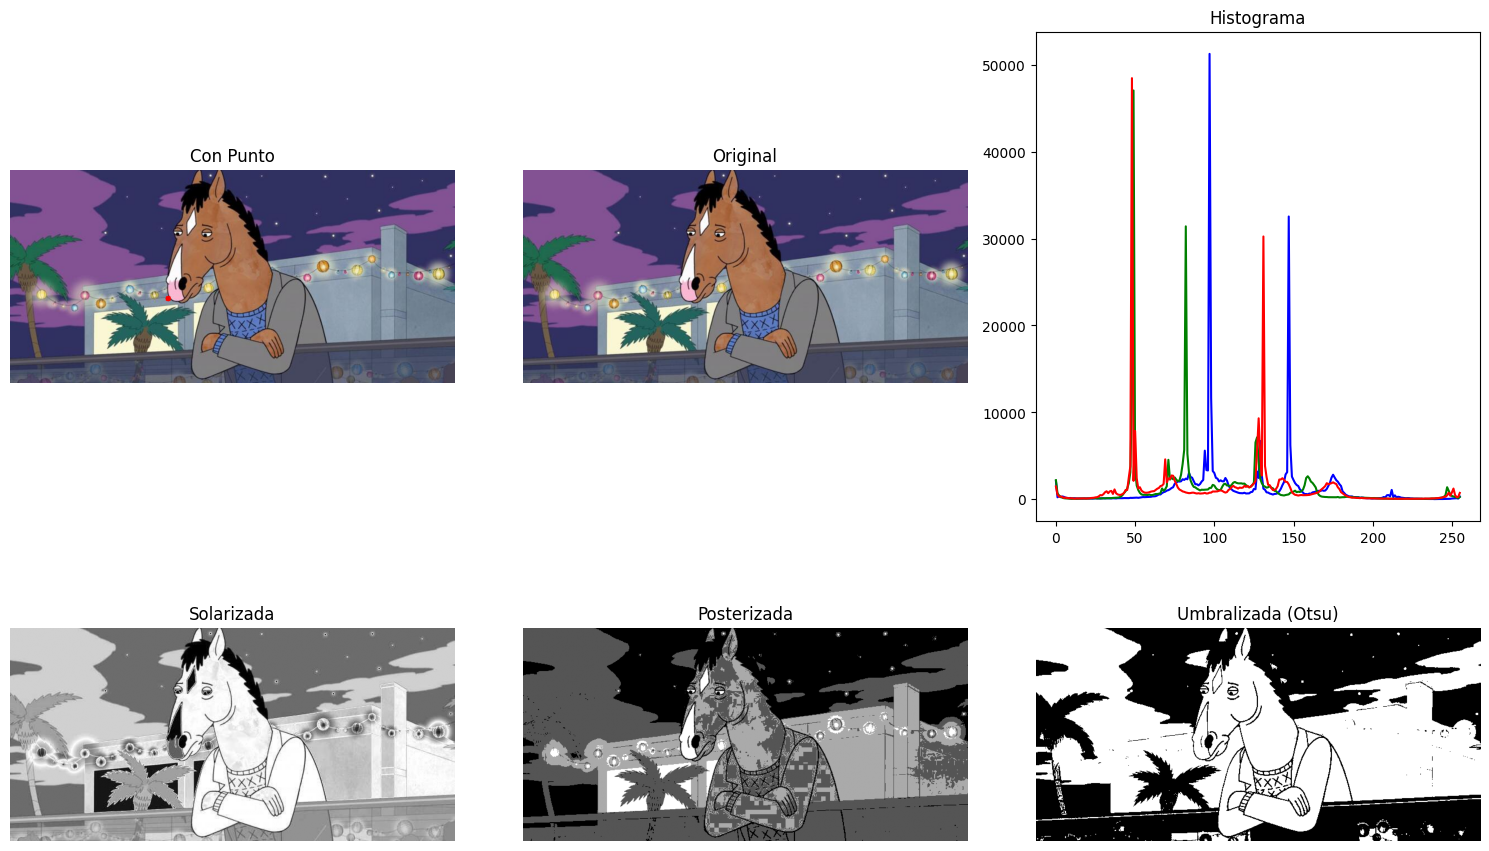

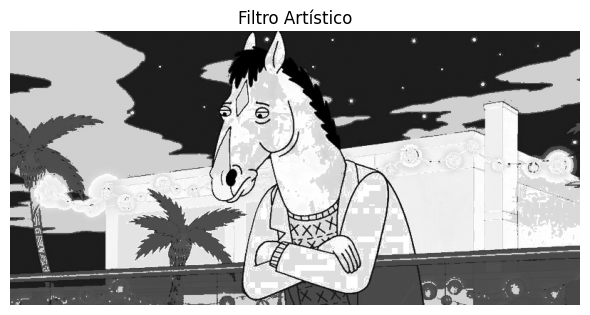

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt, random

img = cv2.imread("1.jpg")
h, w, _ = img.shape
x, y = random.randint(0, w-1), random.randint(0, h-1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_cp = img_rgb.copy()
cv2.circle(img_cp, (x, y), 5, (255, 0, 0), -1)
cv2.imwrite("imagen_con_punto.jpg", cv2.cvtColor(img_cp, cv2.COLOR_RGB2BGR))

colors = ('b', 'g', 'r')
plt.figure()
for i, col in enumerate(colors):
    plt.plot(cv2.calcHist([img], [i], None, [256], [0, 256]), color=col)
plt.xlim([0,256]); plt.title("Histograma por Canales")
plt.savefig("histograma_canales.png"); plt.close()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
umbral = 127
img_sol = np.where(img_gray < umbral, img_gray, 255 - img_gray).astype(np.uint8)
niveles = 4; step = 256 // niveles
img_post = ((img_gray // step) * step).astype(np.uint8)
_, img_umbral = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
f_art = cv2.addWeighted(img_sol, 0.5, img_post, 0.5, 0)
f_art = cv2.addWeighted(f_art, 0.7, img_umbral, 0.3, 0)

cv2.imwrite("imagen_solarizada.jpg", img_sol)
cv2.imwrite("imagen_posterizada.jpg", img_post)
cv2.imwrite("imagen_umbralizada.jpg", img_umbral)
cv2.imwrite("filtro_artistico.jpg", f_art)

plt.figure(figsize=(15,10))
plt.subplot(2,3,1); plt.imshow(img_cp); plt.title("Con Punto"); plt.axis("off")
plt.subplot(2,3,2); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(2,3,3)
for i, col in enumerate(colors):
    plt.plot(cv2.calcHist([img], [i], None, [256], [0, 256]), color=col)
plt.title("Histograma")
plt.subplot(2,3,4); plt.imshow(img_sol, cmap="gray"); plt.title("Solarizada"); plt.axis("off")
plt.subplot(2,3,5); plt.imshow(img_post, cmap="gray"); plt.title("Posterizada"); plt.axis("off")
plt.subplot(2,3,6); plt.imshow(img_umbral, cmap="gray"); plt.title("Umbralizada (Otsu)"); plt.axis("off")
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,5))
plt.imshow(f_art, cmap="gray"); plt.title("Filtro Artístico"); plt.axis("off")
plt.tight_layout(); plt.show()


A que nos referimos si hablamos de una imagen digital?

R.Es la representación de una imagen en formato numérico (píxeles) para que pueda ser procesada o mostrada por dispositivos electrónicos.

Que es la profundidad del color?

R: Es el número de bits usados para representar el color de cada píxel; a mayor profundidad, más colores posibles.

Cual es la diferencia entre CMKY Y RGB

R:
RGB (Rojo, Verde, Azul): modelo aditivo usado en pantallas.

CMYK (Cian, Magenta, Amarillo, Negro): modelo sustractivo usado en impresión.